<a href="https://colab.research.google.com/github/NazrinEminova/Machine-Learning-Model/blob/main/Classification%3B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame = False)

In [ ]:
X, y = mnist.data, mnist.target
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
X.shape

(70000, 784)

In [ ]:
X[0].shape

(784,)

In [ ]:
X[0].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

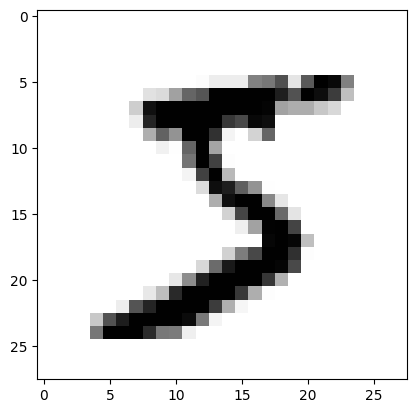

In [ ]:
import matplotlib.pyplot as plt

def plot_digit(data):
  image = data.reshape(28,28)
  plt.imshow(image, cmap = 'binary')

plot_digit(X[0])

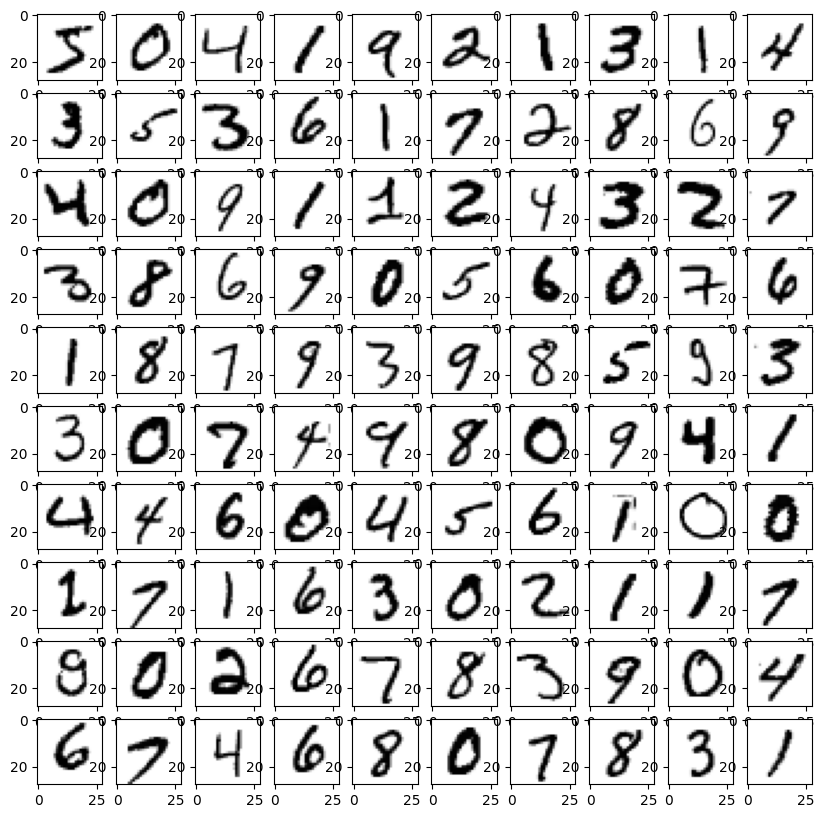

In [ ]:
plt.figure(figsize =(10,10))
for idx, i in enumerate(X[:100]):
  plt.subplot(10,10, idx +1)
  plot_digit(i)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[:60000], y[:60000],y[:60000]

In [ ]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [ ]:
y_train

array(['5', '0', '4', ..., '5', '6', '8'], dtype=object)

In [ ]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.score(X_test, y_test_5)

0.9522666666666667

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv =3 , scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train_5)
cross_val_score(dummy_clf, X_train, y_train_5, cv =3 , scoring = 'accuracy')

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

In [ ]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

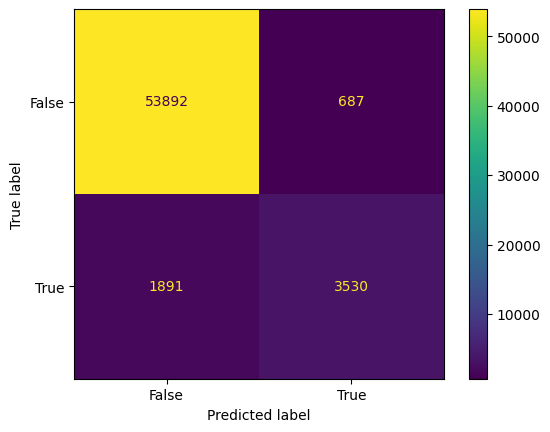

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [ ]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [ ]:
cm[1,1] / (cm[1,1] + cm[0 , 1])

0.8370879772350012

In [ ]:
cm[1,1]/ (cm[1,1] + cm[1,0])

0.6511713705958311

In [ ]:
sgd_clf.decision_function(X_train[[0]])

array([2164.22030239])

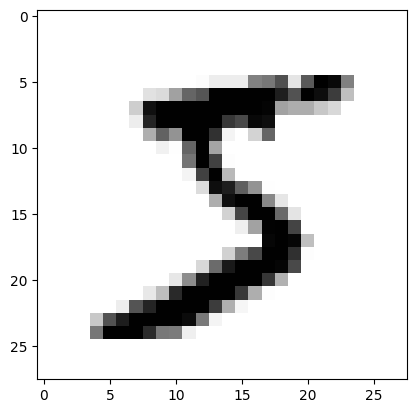

In [ ]:
plot_digit(X_train[0])

In [ ]:
y_train_pred = cross_val_predict(sgd_clf,X_train, y_train_5, cv =3, method = 'decision_function')
y_train_pred

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

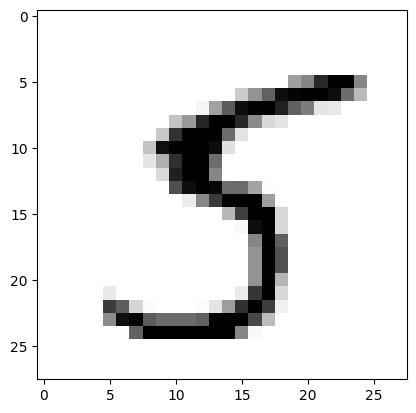

In [ ]:
plot_digit(X_train[-3])

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_train_pred)

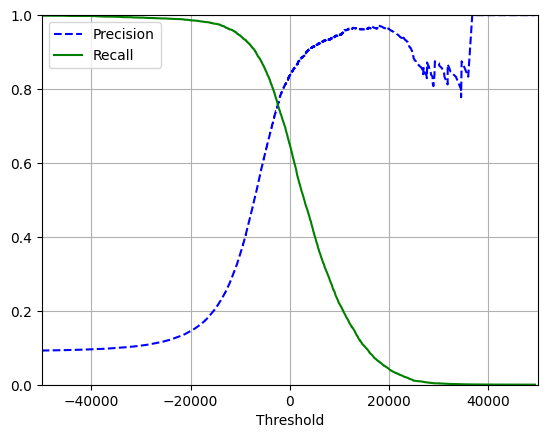

In [ ]:
plt.plot(thresholds,precisions[:-1], "b--",label = "Precision")
plt.plot(thresholds,recalls[:-1], "g-",label = "Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.axis([-50000, 50000,0, 1])
plt.show()


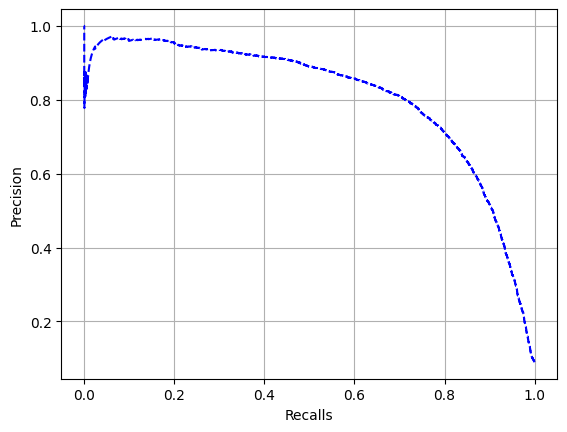

In [ ]:
plt.plot(recalls,precisions, "b--")
plt.xlabel("Recalls")
plt.ylabel("Precision")
plt.grid()

In [ ]:
import numpy as np
idx_for_90_precision = np.argmax(precisions >= 0.90)
threshold_90_precision = thresholds[idx_for_90_precision]
threshold_90_precision


3370.0194991439557

In [ ]:
preds_90_precision = y_train_pred > threshold_90_precision
preds_90_precision

array([False, False, False, ...,  True, False, False])

In [ ]:
precision_score(y_train_5, preds_90_precision)

0.9

In [ ]:
recall_score(y_train_5, preds_90_precision)

0.47980077476480354

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr,thresholds = roc_curve(y_train_5, y_train_pred)

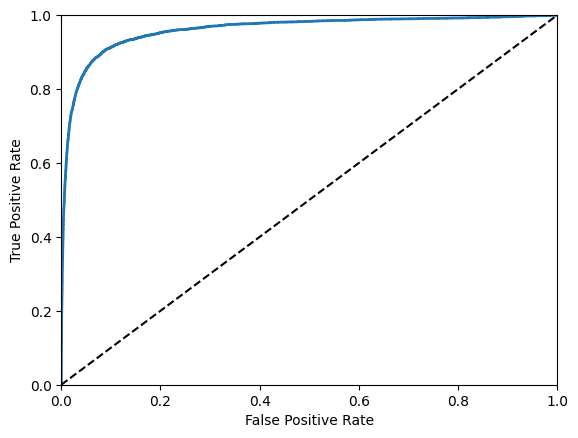

In [ ]:
plt.plot(fpr, tpr, linewidth = 2)
plt.plot([0,1], [0,1], 'k--')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_train_pred)

0.9604938554008616

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf =  RandomForestClassifier(random_state = 42)
y_train_pred = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                 method = 'predict_proba')

In [ ]:
forest_clf.fit(X_train, y_train_5)
forest_clf.predict_proba(X_train[[0]].reshape(1,-1))



array([[0.02, 0.98]])

In [ ]:
y_train_pred = y_train_pred[:,1]
y_train_pred

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [ ]:
y_train_pred_tree = y_train_pred > 0.4
precision_score(y_train_5, y_train_pred_tree)

0.9754950009801999

In [ ]:
recall_score(y_train_5, y_train_pred_tree)

0.9179118243866445

#Multiclass Classification

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC()
svm_clf.fit(X_train[:2000], y_train[:2000])

SVC()

In [ ]:
svm_clf.score(X_test, y_test)

0.9269833333333334

In [ ]:
#OVR/OVA -> One versus Rest/One versus All -> 10 classes -> 10 models
#OVO -> One versus One -> 10 classes -> n * (n - 1) / 2 = 45 models


In [ ]:
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC())
cross_val_score(ovr_clf, X_train[:1000], y_train[:1000], cv = 3)

array([0.88622754, 0.89489489, 0.89189189])

In [ ]:
sgf_clf = SGDClassifier(random_state = 42)
cross_val_score(sgd_clf, X_train[:2000], y_train[:2000], cv = 3)

array([0.84857571, 0.80809595, 0.84084084])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled[:2000], y_train[:2000], cv =3)

array([0.84857571, 0.82008996, 0.85885886])

#Multilabel Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(int) % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [ ]:
knn_clf.predict([X_test[200]])

array([[False,  True]])

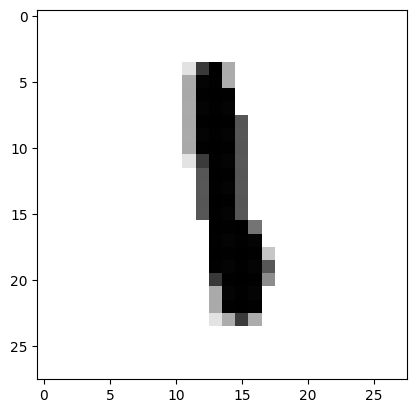

In [ ]:
plot_digit(X_train[200])

#Multioutput Classification

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

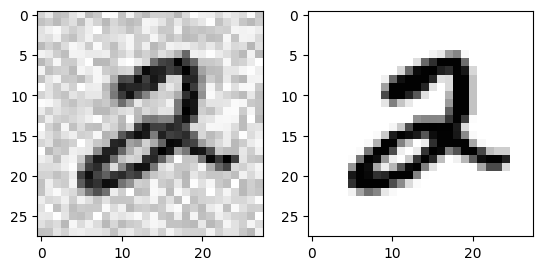

In [ ]:
plt.subplot(121)
plot_digit(X_test_mod[5])
plt.subplot(122)
plot_digit(y_test_mod[5])

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

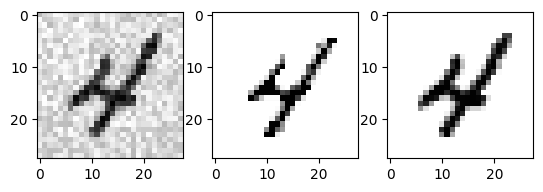

In [ ]:
plt.subplot(131)
plot_digit(X_test_mod[9])
plt.subplot(132)
plot_digit(knn_clf.predict([X_test_mod[9]]))
plt.subplot(133)
plot_digit(y_test_mod[9])

In [ ]:
#class weights
#S.M.O.T.E oversampling techniques
#underSampling